## Size Bounds
The notebook is a quick examination of the dataset, finding the minimum and maximum dimensions.

In [69]:
import os
from PIL import Image


# Find all images
widths = []
heights = []
all_images = []

ignore_mine = True

for dirpath, dirs, files in os.walk("../data"):
    if files and (not ignore_mine or not dirpath.startswith("../data/test_mine")):
        for file in files:
            all_images.append(os.path.join(dirpath, file))

# Find all dimensions
for i, img_name in enumerate(all_images):
    image = Image.open(img_name)  # Does not load into memory, speeding up dimension retrieval considerbly
    widths.append(image.size[0])
    heights.append(image.size[1])
    if i % 2500 == 0:
        print("%d / %d" % (i, len(all_images)))
    

0 / 37500
2500 / 37500
5000 / 37500
7500 / 37500
10000 / 37500
12500 / 37500
15000 / 37500
17500 / 37500
20000 / 37500
22500 / 37500
25000 / 37500
27500 / 37500
30000 / 37500
32500 / 37500
35000 / 37500


#### Plot Histograms

In [70]:
import matplotlib.pyplot as plt
import numpy as np

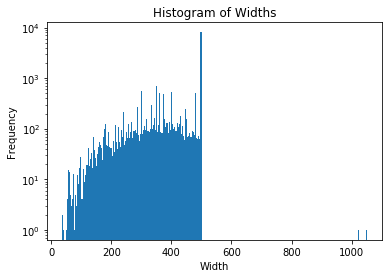

Min width: 37, Max width: 1050.
Mean width: 404.1, Median width: 447.0.


In [78]:
fig, ax = plt.subplots()

width_hist, bins = np.histogram(widths, bins=len(set(widths)))
hist_width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, width_hist, align='center', width=hist_width)

ax.set_yscale('log')
plt.title("Histogram of Widths")
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.show()

print("Min width: %d, Max width: %d." % (min(widths), max(widths)))
print("Mean width: %.1f, Median width: %.1f." % (np.mean(widths), np.median(widths)))

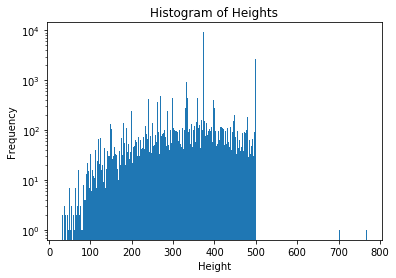

Min height: 32, Max height: 768.
Mean height: 360.3, Median height: 374.0.


In [79]:
fig, ax = plt.subplots()

height_hist, bins = np.histogram(heights, bins=len(set(heights)))
hist_width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, height_hist, align='center', width=hist_width)

ax.set_yscale('log')
plt.title("Histogram of Heights")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

print("Min height: %d, Max height: %d." % (min(heights), max(heights)))
print("Mean height: %.1f, Median height: %.1f." % (np.mean(heights), np.median(heights)))

#### Find both dimensions of smallest images

In [80]:
dims = list(zip(widths, heights, all_images))

sorted_by_height = sorted(dims, key=lambda x: x[0])
sorted_by_width = sorted(dims, key=lambda x: x[1])


print("By Height:")
for dim in sorted_by_height[:10]:
    print(dim)
    
print("By Width:")
for dim in sorted_by_width[:10]:
    print(dim)

By Height:
(37, 50, '../data/test_kaggle/images/5669.jpg')
(37, 50, '../data/test_kaggle/images/11756.jpg')
(41, 50, '../data/test_kaggle/images/46.jpg')
(42, 62, '../data/train/dogs/dog.10733.jpg')
(50, 38, '../data/train/dogs/dog.10747.jpg')
(50, 49, '../data/train/cats/cat.6614.jpg')
(50, 49, '../data/train/cats/cat.10392.jpg')
(50, 49, '../data/test_kaggle/images/8674.jpg')
(50, 49, '../data/test_kaggle/images/11007.jpg')
(51, 99, '../data/train/dogs/dog.10225.jpg')
By Width:
(60, 32, '../data/train/cats/cat.6402.jpg')
(195, 33, '../data/outliers/train/dogs/dog.4367.jpg')
(59, 36, '../data/train/cats/cat.5534.jpg')
(99, 37, '../data/train/dogs/dog.11248.jpg')
(145, 38, '../data/outliers/train/cats/cat.9171.jpg')
(50, 38, '../data/train/dogs/dog.10747.jpg')
(59, 39, '../data/train/dogs/dog.9705.jpg')
(60, 39, '../data/train/cats/cat.4821.jpg')
(59, 41, '../data/valid/cats/cat.2433.jpg')
(60, 44, '../data/test_kaggle/images/10456.jpg')


# Outliers!
My investigation in the sizes of images, to decide on data preformatting before training actually helped me find some outliers in the dataset.

Note that at this point, the outliers are already moved away from the dataset.

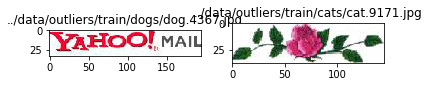

In [81]:

name = '../data/outliers/train/dogs/dog.4367.jpg'
plt.subplot(121)
plt.title(name)
plt.imshow(plt.imread(name))

name = '../data/outliers/train/cats/cat.9171.jpg'
plt.subplot(122)
plt.title(name)
plt.imshow(plt.imread(name))

plt.show()

In [82]:
from IPython.display import Image
from IPython.display import display

def display_images_jupyter(filenames):
    images = (Image(filename=filename) for filename in filenames)
    display(*images)

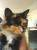

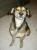

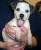

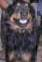

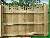

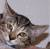

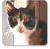

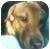

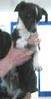

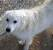

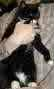

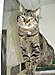

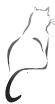

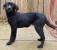

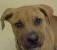

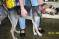

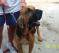

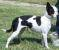

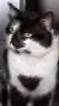

In [83]:
display_images_jupyter([dim[2] for dim in sorted_by_height[:20]])

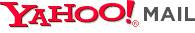

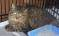

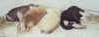

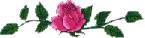

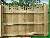

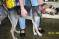

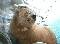

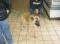

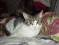

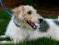

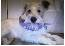

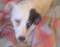

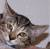

In [84]:
display_images_jupyter([dim[2] for dim in sorted_by_width[:20]])

#### Final examination for possible outliers

In [85]:
def get_skewness_ratio(x_dim, y_dim):
    assert x_dim != 0 and y_dim != 0
    
    ratio = 1. * x_dim / y_dim
    if ratio < 1.0:
        ratio = 1. / ratio
        
    return ratio


(195, 33, '../data/outliers/train/dogs/dog.4367.jpg', 5.909090909090909)
(145, 38, '../data/outliers/train/cats/cat.9171.jpg', 3.8157894736842106)
(500, 148, '../data/outliers/train/cats/cat.5351.jpg', 3.3783783783783785)
(153, 499, '../data/train/dogs/dog.10749.jpg', 3.2614379084967324)
(300, 93, '../data/train/cats/cat.5773.jpg', 3.225806451612903)
(500, 167, '../data/train/cats/cat.11349.jpg', 2.9940119760479043)
(422, 145, '../data/train/cats/cat.12243.jpg', 2.910344827586207)
(300, 104, '../data/train/dogs/dog.11526.jpg', 2.8846153846153846)
(175, 500, '../data/train/dogs/dog.9632.jpg', 2.857142857142857)
(500, 176, '../data/train/cats/cat.3324.jpg', 2.840909090909091)
(150, 422, '../data/train/cats/cat.5981.jpg', 2.8133333333333335)
(500, 178, '../data/train/cats/cat.11255.jpg', 2.808988764044944)
(200, 72, '../data/train/dogs/dog.12331.jpg', 2.7777777777777777)
(300, 108, '../data/train/cats/cat.10192.jpg', 2.7777777777777777)
(499, 180, '../data/valid/cats/cat.728.jpg', 2.77222

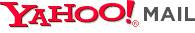

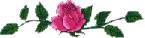

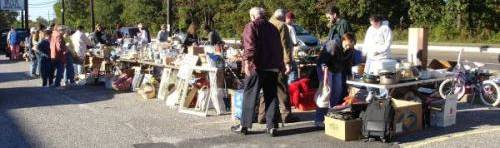

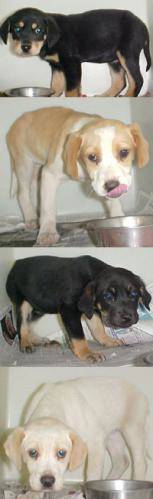

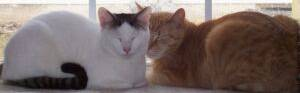

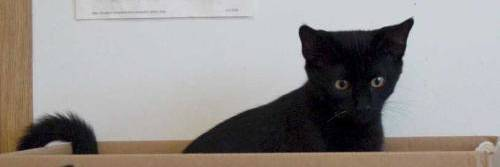

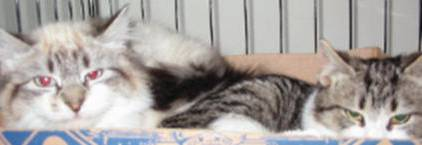

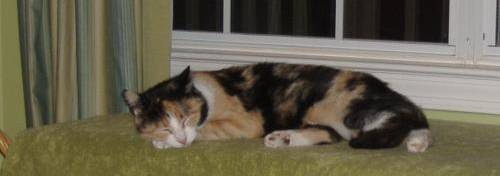

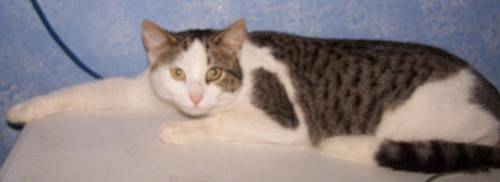

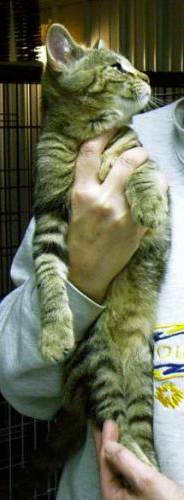

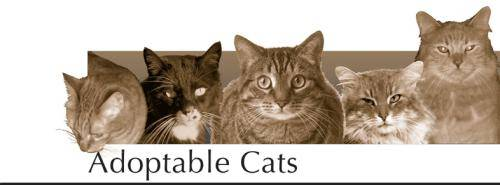

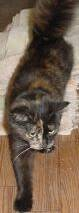

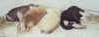

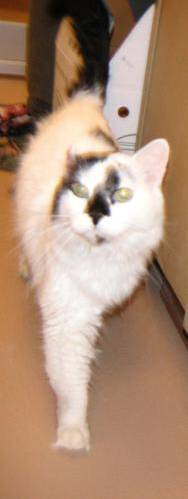

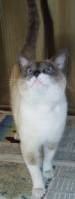

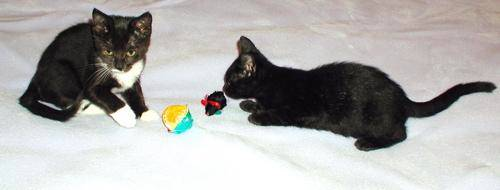

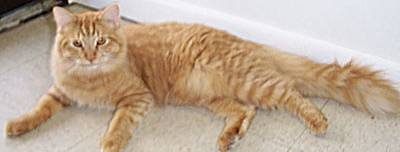

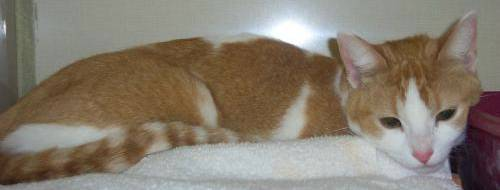

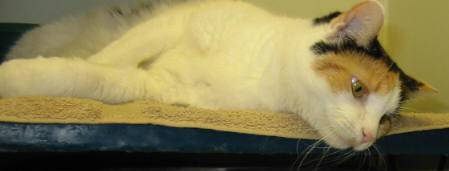

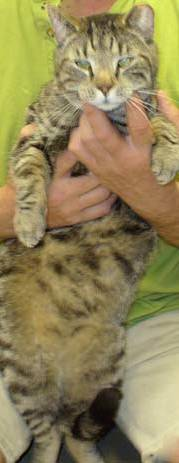

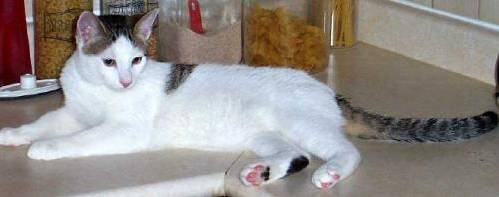

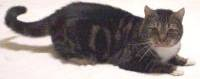

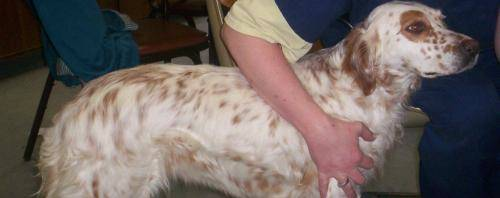

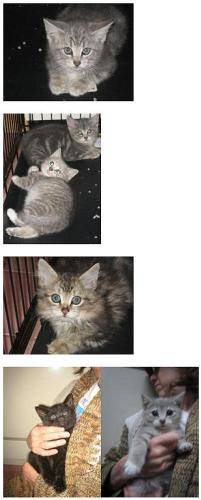

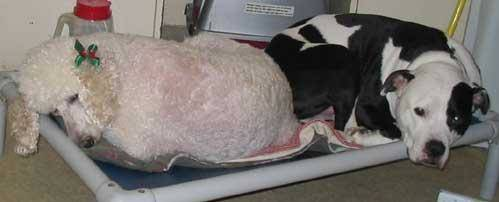

In [86]:
skewed_dims = []
for x, y, fname in dims:
    skewed_dims.append((x, y, fname, get_skewness_ratio(x, y)))
    
skewed_dims = sorted(skewed_dims, key=lambda x: x[3], reverse=True)

for dim in skewed_dims[:40]:
    print(dim)
display_images_jupyter([dim[2] for dim in skewed_dims[:40]])